In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [23]:

# Load the dataset
df = pd.read_csv('insurance.csv')

# --- Data Preprocessing ---
# Convert categorical variables to numerical using one-hot encoding
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Select features for clustering
X = df_processed.copy()

In [24]:
# --- Feature Scaling ---
# K-means is sensitive to the scale of the features, so we standardize them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:

# --- Find the Optimal Number of Clusters (Elbow Method) ---
inertia = []
range_k = range(1, 11)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



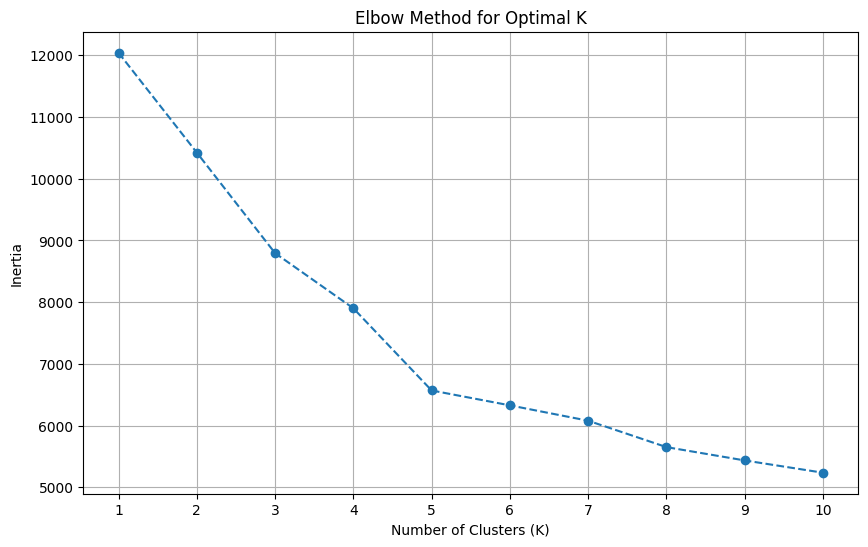

In [26]:
# Plot the Elbow curve to find the optimal k
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range_k)
plt.grid(True)
plt.show()


In [ ]:
# --- Apply K-means with the Optimal K ---
# Based on the elbow plot, let's assume k=4 is the optimal number of clusters
# You can change this number based on your interpretation of the plot
]=


Cluster Analysis (Mean of features per cluster):
               age        bmi  children       charges  sex_male  smoker_yes  \
cluster                                                                       
0        39.268519  29.173503  1.046296  13406.384516  0.503086    0.206790   
1        39.196923  29.199785  1.147692  12417.575374  0.495385    0.178462   
2        38.939560  33.355989  1.049451  14735.411438  0.519231    0.250000   
3        39.455385  30.596615  1.141538  12346.937377  0.501538    0.178462   

         region_northwest  region_southeast  region_southwest  
cluster                                                        
0                     0.0               0.0               0.0  
1                     1.0               0.0               0.0  
2                     0.0               1.0               0.0  
3                     0.0               0.0               1.0  


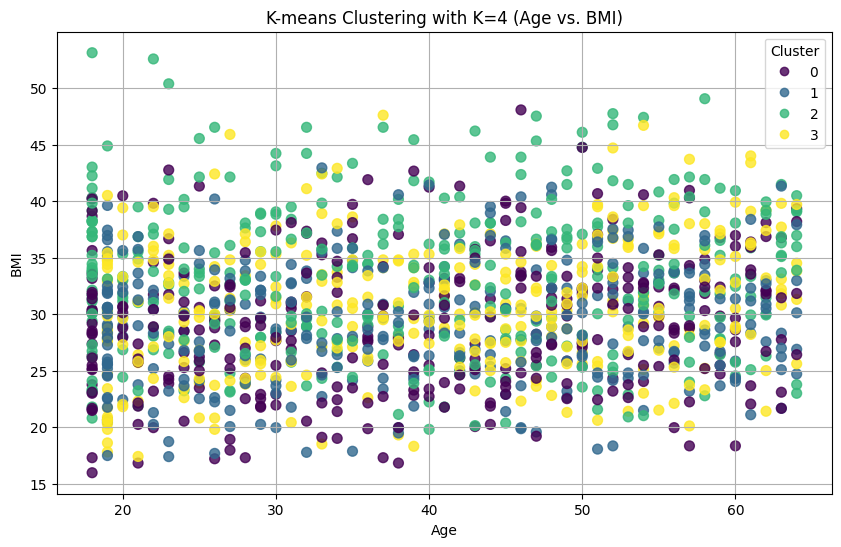

In [28]:

# --- Visualize the Clusters ---
# Visualize the clusters using two key features to see the separation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['bmi'], c=df['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title(f'K-means Clustering with K={optimal_k} (Age vs. BMI)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()